# **OVERVIEW**
Thuật toán sắp xếp không so sánh (`non-comparison`) như `Counting Sort` đạt hiệu quả thời gian với độ phức tạp `O(n + k)`, nhưng vẫn tồn tại một số hạn chế:

1. Do sử dụng chỉ mục mảng để biểu diễn giá trị, các phần tử cần sắp xếp chỉ có thể là số nguyên không âm.
2. Tốn bộ nhớ khi tạo mảng `Counting` với kích thước phụ thuộc vào giá trị lớn nhất (`max_value`) trong mảng, dẫn đến lãng phí lớn. **Ví dụ:**
```python
 arr = [1, 900, 2]
```
→ Mặc dù mảng `arr` chỉ có `3` phần tử, ta phải tạo mảng `Counting` có độ dài `901` nhưng chỉ sử dụng `3` vị trí: `1`, `2`, và `900`.

Do đó, dù thuật toán không so sánh (`non-comparison`) như `Counting Sort` tối ưu về thời gian với độ phức tạp `O(n + k)`, nhưng lại lãng phí bộ nhớ. Để khắc phục, `Radix Sort` ra đời, tận dụng ưu điểm thời gian, nhưng giảm đáng kể lãng phí bộ nhớ. Thay vì đếm tần suất của toàn bộ giá trị, `Radix Sort` sắp xếp từng chữ số từ hàng đơn vị đến hàng cao nhất.

[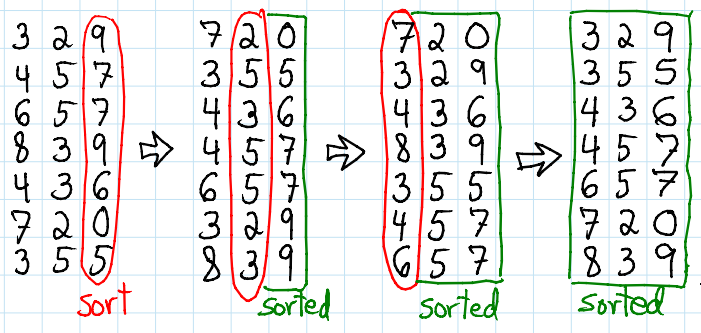](https://www.youtube.com/watch?v=nu4gDuFabIM)

# Ý TƯỞNG

`Radix Sort` không đếm tần suất như `Counting Sort`, mà sắp xếp các phần tử bằng cách so sánh từng chữ số từ hàng đơn vị đến hàng cao nhất, đảm bảo tính ổn định (giữ nguyên thứ tự tương đối của các phần tử). Nếu các số có `số chữ số` khác nhau, các hàng thiếu được mặc định là `0`.

**Cụ thể:**
1. Sắp xếp các phần tử dựa trên chữ số ở hàng đơn vị, sử dụng `Counting Sort`.
2. Sắp xếp các phần tử dựa trên chữ số ở hàng chục, giữ nguyên thứ tự tương đối từ bước trước, sử dụng `Counting Sort`.
3. Lặp lại quá trình cho các hàng cao hơn (hàng trăm, hàng nghìn,...) cho đến chữ số cao nhất.

👉 Để xử lý từng chữ số, ta sử dụng `Counting Sort` làm thuật toán con. Vì các chữ số ở mỗi hàng chỉ nằm trong khoảng từ `0` đến `9`, mảng `Counting` chỉ cần `10` phần tử, giúp tiết kiệm bộ nhớ và tận dụng hiệu quả của `Counting Sort`.

🤔 `Counting Sort` chỉ lưu tần suất giá trị, không theo dõi vị trí ban đầu của các phần tử trong mảng. Vậy `Radix Sort` đảm bảo tính ổn định như thế nào? Người ta sử dụng kỹ thuật sau: Tính tổng lũy tích tần suất trong mảng `Counting` để xác định vị trí chèn cho mỗi phần tử. Cụ thể, vị trí chèn của phần tử có chữ số `i` bắt đầu từ tổng tần suất của các chữ số từ `0` đến `i-1`, sau đó giảm dần để đảm bảo tính ổn định.

```python
  for i in range(1, 10):
      count[i] += count[i - 1]
```

**Độ phức tạp:** `O(d(n + k))`, trong đó `d` là số chữ số tối đa của các phần tử, `n` là số phần tử trong mảng, và `k` là kích thước mảng tạm.

**Ví dụ: LSD (Least Significant Digit) - biến thể của Radix Sort**

📌 Trong thuật toán LSD Radix Sort, ta bắt đầu sắp xếp từ chữ số ít quan trọng nhất → đến chữ số quan trọng nhất. → Sắp xếp từ phải sang trái.

```python
 arr = [170, 45, 75, 90, 802, 24, 2, 66]
```

```python
     Index:  0  1  2  3  4  5  6  7  8  9
 Counting = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

 bắt đầu với hàng đơn vị

 arr = [170, 45, 75, 90, 802, 24, 2, 66]
          ↑   ↑   ↑   ↑    ↑   ↑  ↑   ↑

 temp = [0, 5, 5, 0, 2, 4, 2, 6]

     Index:  0  1  2  3  4  5  6  7  8  9
 Counting = [0, 0, 2, 0, 1, 2, 1, 0, 0, 0]
```

```python
 Tính vị trí

     Index:  0  1  2  3  4  5  6  7  8  9
 Counting = [2, 2, 4, 4, 5, 7, 8, 0, 0, 0]

```

```python
 Sắp xếp lại (Đáng lẻ phải bắt đầu từ phải sang → trái 😓😓😓)

        i=0
         ↓
 arr = [170, 45, 75, 90, 802, 24, 2, 66]

 → digit = 0

 Tìm vị trí index = Counting[0] - 1 👉 8 vị trí nhưng index bắt đầu từ 0 - 7
                  = 2 - 1
                  = 1

           Counting[0] = index
           Counting[0] = 1

        i=0  
         ↓    
 arr = [170, 45, 75, 90, 802, 24, 2, 66]
                      ↓
                      
 result = [0, 170, 0, 0, 0, 0, 0, 0]  
               ↑
            index=1           
```

```python
             i=1
              ↓
 arr = [170, 45, 75, 90, 802, 24, 2, 66]

 → digit = 5

 Tìm vị trí index = Counting[5] - 1
                  = 7 - 1
                  = 6

            Counting[5] = index
            Counting[5] = 6

             i=1
              ↓    
 arr = [170, 45, 75, 90, 802, 24, 2, 66]
                      ↓
                      
 result = [0, 170, 0, 0, 0, 0, 45, 0]  
                               ↑
                             index=6           
```

```python
                 i=2
                  ↓
 arr = [170, 45, 75, 90, 802, 24, 2, 66]

 → digit = 5

 Tìm vị trí index = Counting[5] - 1
                  = 6 - 1
                  = 5

            Counting[5] = index
            Counting[5] = 5            

                i=2
                 ↓    
 arr = [170, 45, 75, 90, 802, 24, 2, 66]
                      ↓
                      
 result = [0, 170, 0, 0, 0, 75, 45, 0]  
                             ↑
                          index=5           
```

```python
                    i=3
                     ↓
 arr = [170, 45, 75, 90, 802, 24, 2, 66]

 → digit = 0

 Tìm vị trí index = Counting[0] - 1
                  = 1 - 1
                  = 0

            Counting[0] = index
            Counting[0] = 0            

                    i=3
                     ↓    
 arr = [170, 45, 75, 90, 802, 24, 2, 66]
                      ↓
                      
 result = [90, 170, 0, 0, 0, 75, 45, 0]  
           ↑
         index=5           
```

```python
                         i=4
                          ↓
 arr = [170, 45, 75, 90, 802, 24, 2, 66]

 → digit = 2

 Tìm vị trí index = Counting[2] - 1
                  = 4 - 1
                  = 3

            Counting[2] = index
            Counting[2] = 3            

                         i=4
                          ↓    
 arr = [170, 45, 75, 90, 802, 24, 2, 66]
                      ↓
                      
 result = [90, 170, 0, 802, 0, 75, 45, 0]  
                        ↑
                      index=3           
```

```python
                              i=5
                               ↓
 arr = [170, 45, 75, 90, 802, 24, 2, 66]

 → digit = 4

 Tìm vị trí index = Counting[4] - 1
                  = 5 - 1
                  = 4

            Counting[4] = index
            Counting[4] = 4           

                              i=5
                               ↓    
 arr = [170, 45, 75, 90, 802, 24, 2, 66]
                      ↓
                      
 result = [90, 170, 0, 802, 24, 75, 45, 0]  
                            ↑
                      index=4           
```


```python
                                 i=6
                                  ↓
 arr = [170, 45, 75, 90, 802, 24, 2, 66]

 → digit = 2

 Tìm vị trí index = Counting[2] - 1
                  = 3 - 1
                  = 2

            Counting[2] = index
            Counting[2] = 2           

                                 i=6
                                  ↓    
 arr = [170, 45, 75, 90, 802, 24, 2, 66]
                      ↓
                      
 result = [90, 170, 2, 802, 24, 75, 45, 0]  
                    ↑
                  index=2           
```

```python
                                    i=7
                                     ↓
 arr = [170, 45, 75, 90, 802, 24, 2, 66]

 → digit = 6

 Tìm vị trí index = Counting[6] - 1
                  = 8 - 1
                  = 7

            Counting[6] = index
            Counting[6] = 7           

                                     i=7
                                      ↓    
 arr = [170, 45, 75, 90, 802, 24, 2, 66]
                      ↓
                      
 result = [90, 170, 2, 802, 24, 75, 45, 66]  
                                        ↑
                                      index=7           
```

👉 Rồi tiến hành làm như vậy với hàng chục, hàng trăm cho đến khi mảng được sắp xếp xong.




# **CODE**
Trong phần này tôi sẽ tiến hành code lại thuật toán `LSD Radix Sort` bằng ngôn ngữ `Python` 😤😤😤.


In [ ]:
def lsd_radix_sort(arr: list) -> list:
  loop = max(arr)
  n = len(arr)
  pos = 0 # 0 đại diện cho hàng đơn vị
  while loop >= 10**pos:
    # Tạo mảng Counting
    Counting = [0] * 10

    # Tạo mảng tạm để chứa mảng sắp xếp ở hàng pos
    tmp_array = [0] * n

    # Tiến hành Counting Sort
    for num in arr:
      digit = (num // (10**pos)) % 10
      Counting[digit] += 1

    # Tính vị trí
    for i in range(1, 10):
      Counting[i] += Counting[i-1]

    # Tiến hành sắp xếp lại chuẩn LSD
    for i in range(n-1, -1, -1):
      # Lấy số tại hàng pos
      digit = (arr[i] // (10**pos)) % 10
      # Lấy vị trí và chèn
      index = Counting[digit] - 1
      tmp_array[index] = arr[i]
      # Giảm vị trí lại
      Counting[digit] -= 1

    # Gán ngược lại cho arr
    arr[:] = tmp_array[:]
    # Tăng lên hàng số tiếp theo
    pos += 1

  return arr


arr = [170, 45, 75, 90, 802, 24, 2, 66]
sorted_array = lsd_radix_sort(arr)
print(f"**Mảng sau khi được sắp xếp: {sorted_array}")

**Mảng sau khi được sắp xếp: [2, 24, 45, 66, 75, 90, 170, 802]


# **TADA HẾT RỒI !!! 🥳🥳🥳🥳**

Cảm ơn các bạn đã đọc hết bài `notebook` này, mong các bạn góp ý và ủng hộ mình trong các bài `notebook` sau nhé 😌😌😌